In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete2FN828/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete2FN828/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir=PosixGPath('/tmp/tmp62v01i64tfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao an

In [5]:
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [6]:
nombres_clases = metadatos.features['label'].names

In [7]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#Normalizar los datos (Pasar de 0-225 a 0-1)
def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes /= 255 #Aquí lo pasa de 0-255 a 0-1
    return imagenes, etiquetas

#Normalizar los datos de entrenamiento y rpuebas con la funcion que hicimos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Agregar a cache (Usar memoria en lugar de disco, entrenamiento mas rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

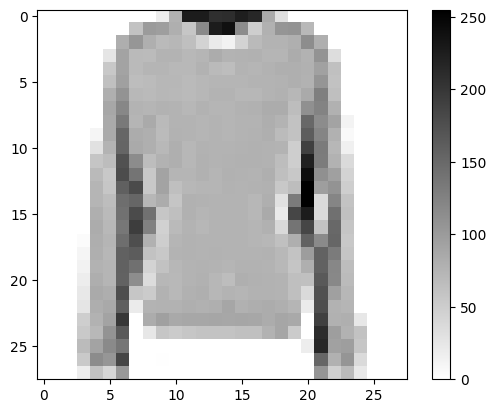

In [9]:
#Mostrar una imagen de los datos de pruebas, de momento mostraremos la primera
for imagen, etiqueta in datos_entrenamiento.take(1):
  break

imagen = imagen.numpy().reshape((28,28)) #Redimensionar, cosas de tensores, lo veremos despues

import matplotlib.pyplot as plt

#Dibujar
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


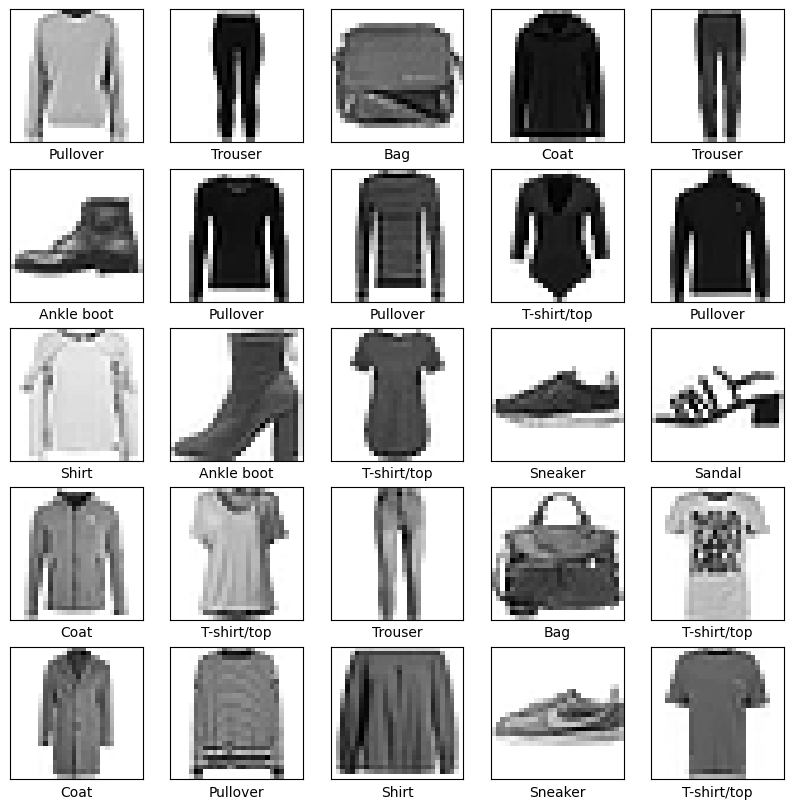

In [12]:
#Saber la categoria correcta con la que viene etiquetada
plt.figure(figsize=(10,10))
for i, (imagen,etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [14]:
#Creamos el modelo

modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 - blanco y negro
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])

In [15]:
#Compilamos el modelo

modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [16]:
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

In [17]:
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [18]:
TAMANO_LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [23]:
import math

#Entrenar
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch = math.ceil(num_ej_entrenamiento/TAMANO_LOTE))


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4109 - accuracy: 0.8561
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4055 - accuracy: 0.8570
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3939 - accuracy: 0.8606
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3903 - accuracy: 0.8607
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3842 - accuracy: 0.8640


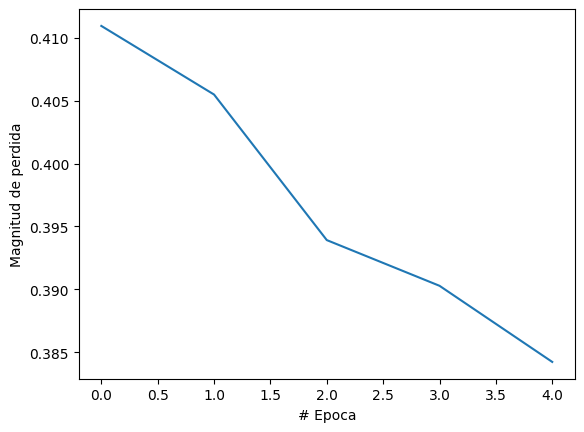

In [24]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

1/1 [==============================] - 0s 49ms/step


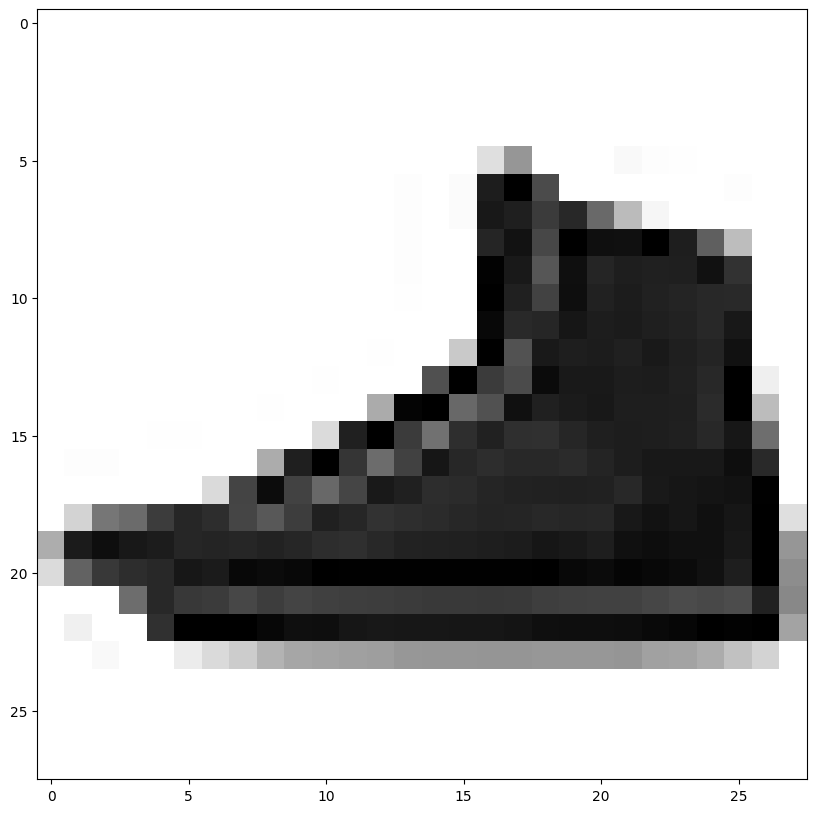

Prediccion: Sneaker


In [37]:
#Tomar cualquier indice del set de pruebas para ver su prediccion

import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

plt.figure(figsize=(10,10))

imagenElegida = imagenes_prueba[3]
imagen = np.array([imagenElegida])
prediccion = modelo.predict(imagen)
imagenDibujo = imagenElegida.reshape((28,28))

plt.imshow(imagenDibujo, cmap=plt.cm.binary)
plt.show()

print("Prediccion: " + nombres_clases[np.argmax(prediccion[0])])